In [12]:
import h5py
file = "file1001763.h5"
filename = "/vol/datasets/cil/2021_11_23_fastMRI_data/knee/unzipped/singlecoil_val/" + file
hf = h5py.File(filename)
slice = hf['kspace'][()][20]

In [22]:
import matplotlib.pyplot as plt

def show_coils(data, cmap=None):
    fig = plt.figure()
    plt.imshow(data, cmap=cmap)

slice.shape

(640, 368)

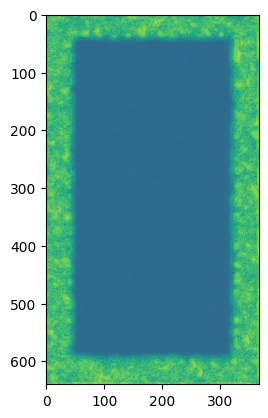

In [40]:
import numpy as np
slice = np.load("1504.npy")
plt.imshow(np.log(abs(slice) + 1e-9))
plt.show()


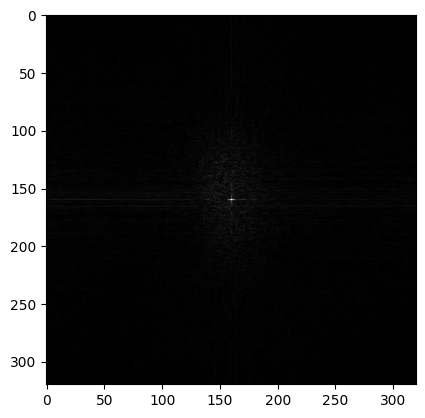

In [41]:
import fastmri
from fastmri.data import transforms as T

slice_kspace2 = T.to_tensor(slice)      # Convert from numpy array to pytorch tensor
slice_image = fastmri.ifft2c(slice_kspace2)           # Apply Inverse Fourier Transform to get the complex image
slice_image_abs = fastmri.complex_abs(slice_image) 
slice_image_abs = T.center_crop(slice_image_abs, (320,320))
show_coils(slice_image_abs, cmap="gray")